# SIMULACIÓN | PROYECTO UNIDAD 1




## INSTRUCCIONES

- El objetivo del proyecto es poner en práctica los contenidos aprendidos en la primera unidad de Probabilidades, con el uso de un set de datos real extraidos de un medio libre. En algunos casos deberá investigar ciertos contenidos para apoyar sus conclusiones.  


- Se presentan las actividades a desarrollar, cada una de ella contiene un set de instrucciones, preguntas y su puntaje asociado. Las preguntas deben ser respondidas en celdas de texto (no se considera respuesta si está en un comentario entre las líneas de código)


- Al finalizar presente las conclusiones de su trabajo. 


- Debe subir a siveduc en la tarea Proyecto1, su notebook y el archivo de datos utilizado.


- El título del notebook debe ser: proyecto1_Apellido1_Apellido2_Apellido3


- Fecha límite de entrega: viernes 8 de octubre 23:59 horas.  


- Este trabajo pondera un 25% del total del curso 

https://www.weather-atlas.com/es/chile/valdivia-clima#rainfall_days

https://www.meteored.cl/tiempo-en_Valdivia-America+Sur-Chile-Los+Lagos--sactual-18266.html

**Integrantes:** 
- Ricardo Coronado
- Eduardo Hopperdietzel
- Diego Sandoval

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib notebook

import ipywidgets as widgets
from IPython.display import display

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
import scipy


# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.dpi'] = 100

import seaborn as sns

from IPython.core.pylabtools import figsize

def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

In [2]:
import random

## Parte I : Propiedades de las Probabilidades



A continuación se presenta la simulación de una población, representada por el dinero que dispone cada persona y sus transacciones económicas. 

#### Referencia:
https://nbviewer.jupyter.org/url/norvig.com/ipython/Economics.ipynb

**gini**: Definición de la métrica de equidad de gini 

**transaccion**: accion de intercambio de dinero, puede ser justa o injusta

**interaccion**: eleccion de los actores que realizan la transacción

**simula**: funcion de simulacion, dinerop: lista que representa la cantidad de dinero actual que tiene cada persona, T: cantidad de iteraciones 

In [ ]:
def gini(y):
    "Calcula el coeficiente de Gini: una medida de la equidad/inequidad en la"
    "población y (representada por una lista que contabiliza el dinero actual de cada persona."
    y = sorted(y)
    n = len(y)
    numer = 2 * sum((i+1) * y[i] for i in range(n))
    denom = n * sum(y)
    return (numer / denom) - (n + 1) / n

def transaccion(A, B):
    "Reune el dinero de A y B en un pozo y luego lo distribuye aleatoriamente entre los dos actores."
    pozo = A + B
    parte1 = random.uniform(0,pozo)
    return parte1, pozo - parte1

def transaccion2(A, B):
    global nivel_desigualdad
    pozo = A + B
    parte1 = pozo*(1.0-nivel_desigualdad)*0.5
    return parte1, pozo - parte1

def transaccion_injusta(A, B): return random.choice(([A + B, 0], [0, A + B]))

def interaccion(N): return random.sample(range(N), 2)

def percent(pct, items):
    "The item that is pct percent through the sorted list of items."
    return items[min(len(items)-1, len(items) * pct // 100)]



**SIMULACIÓN: modifíquela para realizar sus cálculos **

In [ ]:
def simula(dinerop, T,trans_func):
    "Ejecuta simulacion de dinerop para T transacciones; devuelve dinerop en cada paso." 
    dinerop = dinerop.copy()
    yield dinerop
    for t in range(1, T + 1):
        i, j = interaccion(len(dinerop))
        dinerop[i], dinerop[j] = trans_func(dinerop[i], dinerop[j]) 
        yield dinerop


1. (1 puto) Analice la simulación, realice las siguientes modificaciones en el proceso e interprete sus resultados:

    (a) Modifique la distribución inicial de dinero. ¿Cómo se comporta el coeficiente de Gini y la distribución de la riqueza?

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(9,4), tight_layout= True)
def gini_plot(n_people,desigualdad_inicial):
    
    ginis = []
    pops = []
    
    init_money_dist = 100*np.exp(1 - np.exp(desigualdad_inicial*np.linspace(0,1,n_people)))
    init_money_dist = init_money_dist.tolist()
            
    for pop in simula(init_money_dist, 10000,transaccion):
        pops.append(np.array(pop))
        ginis.append(gini(pop))
                
    
    its = np.arange(0,len(ginis),1)
    ax[0].clear()
    ax[0].plot(its,ginis)
    ax[0].set_ylim(0, 1)
    ax[0].set_ylabel("Gini")
    ax[0].set_xlabel("N Transacciones")
    
    ax[1].clear()
    ax[1].set_xlim(0, 101)
    ax[1].hist(pops[0], label='inicio', alpha=0.5)
    ax[1].hist(pops[-1],label='final',alpha=0.5)
    ax[1].legend(loc='upper right')
    ax[1].set_ylabel("N Personas")
    ax[1].set_xlabel("Dinero")
    plt.show()
    
inter = widgets.interact(gini_plot,n_people=(2,300,2),desigualdad_inicial=(0,5,0.1))

Podemos ver que claramente si la distribución del dinero inicial es equitativa, el coefciente de Gini es bajo, y que en caso contrario el coeficiente de Gini es alto. Sin embargo independientemente de la distribución de dinero inicial, luego de realizar varias transacciones, el coeficiente de Gini siempre tiende a 0.5. Creemos que esto se debe a la forma en que está implementada la función de transacción, donde se utiliza una distribución uniforme para repartir el dinero entre dos personas aleatoriamente. Al ser una distribución uniforme, entonces la probabilidad de realizar una transacción "equitativa" es la misma que una "desigual", por lo tanto luego de varias transacciones, el dinero no se distribuye ni equtativamente ni de forma desigual, sinó en una forma intermedia entre estas ( Gini = 0.5 ).

    (b) Modifique la función de transacción para aumentar o disminuir el índice de Gini. 

In [ ]:
nivel_desigualdad = 0.0
fig, ax = plt.subplots(1, figsize=(9,4), tight_layout= True)
def gini_plot2(desigualdad):
    
    global nivel_desigualdad
    
    nivel_desigualdad = desigualdad
    ginis = []
    
    init_money_dist = [100] * 30
        
    for pop in simula(init_money_dist, 5000,transaccion2):
        ginis.append(gini(pop))
                
    
    ax.clear()
    its = np.arange(0,len(ginis),1)
    plt.ylim([0, 1])
    ax.plot(its,ginis)
    plt.show()
    
    print("Media Gini:",np.mean(ginis))
    print("D.Std Gini:",np.std(ginis))
    
inter = widgets.interact(gini_plot2,desigualdad=(0,1,0.01))

Añadimos una variable llamada "desigualdad" que toma valores entre 0 y 1. Cuando los valores son cercanos a 0 las transacciones se realizan de tal forma que el pozo formado por dos personas tiende a distribuirse en partes iguales. En caso contrario, para valores cercanos a 1, una de las dos personas se lleva la mayor parte del pozo.

 (c) Comente la simulación propuesta ¿Qué otros factores inciden en los resultados de la simulación?
 
En el gráfico intercativo de la parte a), pudimos observar que mientras mayor sea el número de personas, menor es la variabilidad del coeficiente de Gini tras realizar transacciones. Esto tiene mucho sentido ya que al haber muchas personas, el cambio generado por una única transacción entre dos entes, no afecta demasiado la proporción entre quienes tienen mas y menos dinero.

2. (1 punto) Defina eventos de interés $A$, $B$ y $C$ y calcule las siguientes probabilidades mediante la simulación propuesta:

    (a) $P(A), P(B) y P(C)$ 
    
    (b) $P(A \cup B) $ 

    (c) $P(A \mid C)$
    
Ejemplos de eventos de interés (defina sus propios eventos):
- La mediana de la población es mayor o igual que $x$ pesos.
- El percentil 10% es mayor o igual que $y$ pesos
- El coeficiente de gini de la población es menor que $0.3$



### Definimos Eventos

* A : El coefciente de Gini de la población se encuentra entre 0.4 y 0.48 (inclusive)
* B : La mediana de la población es mayor a \\$300.000
* C : El porcentaje de personas que posee sobre \\$500.000 es menor o igual al 15%

In [ ]:
# Generamos arreglo de dinero de 1000 personas 5000 veces ( 5000 transacciones )
trans = []
for pop in simula([350000]*1000, 5000,transaccion):
    trans.append(np.array(pop))    

In [ ]:
# Calcula P(A)
def PA(trans):
    casosCumple = 0
    casosTotales = len(trans)
    for pop in trans:
        gini_val = gini(pop)
        if gini_val >= 0.4 and gini_val <= 0.48:
            casosCumple += 1
    return float(casosCumple)/float(casosTotales)

# Calcula P(B)
def PB(trans):
    casosCumple = 0
    casosTotales = len(trans)
    for pop in trans:
        median_val = np.median(pop)
        if median_val >= 300000:
            casosCumple += 1
    return float(casosCumple)/float(casosTotales)

# Calcula P(C)
def PC(trans):
    casosCumple = 0
    casosTotales = len(trans)
    pop_len = len(trans[0])
    for pop in trans:
        per_cnt = np.count_nonzero(pop > 500000)
        if float(per_cnt)/float(pop_len) <= 0.15:
            casosCumple += 1
    return float(casosCumple)/float(casosTotales)

# Calcula P(A U B)
def PAUB(trans):
    casosCumple = 0
    casosTotales = len(trans)
    for pop in trans:
        gini_val = gini(pop)
        median_val = np.median(pop)
        
        condA = gini_val >= 0.4 and gini_val <= 0.48
        condB = median_val >= 300000
        
        if condA or condB:
            casosCumple += 1
    return float(casosCumple)/float(casosTotales)

# Calcula P(A|C)
def PACondC(trans):
    casosCumpleAyC = 0
    casosCumpleC = 0
    pop_len = len(trans[0])
    for pop in trans:
        per_cnt = np.count_nonzero(pop > 500000)
        condC = float(per_cnt)/float(pop_len) <= 1.05
        if condC:
            casosCumpleC += 1
            gini_val = gini(pop)
            condA = gini_val >= 0.4 and gini_val <= 0.48
            if condA:
                casosCumpleAyC += 1
            
    return float(casosCumpleAyC)/float(casosCumpleC)

In [ ]:
print("P(A) :",PA(trans))
print("P(B) :",PB(trans))
print("P(C) :",PC(trans))
print("P(A U B) :",PAUB(trans))
print("P(A|C) :",PACondC(trans))

*** Puede tomar como ejemplo los siguientes gráficos y estadísticas presentadas *** 

In [ ]:
import statistics

def percent(pct, items):
    "Devuelve el item que corresponde al porcentaje pct (acumulado) en la lista ordenada de items."
    return items[min(len(items)-1, len(items) * pct // 100)]

def show(dinerop, k=40, percentiles=(1, 10, 50, 90, 99), **kwargs):
    "Ejecuta simulación en k*N pasos, imprimiendo estadísticos y desplegando un histograma. "
    N = len(dinerop)
    inicio = list(dinerop)
    resultado = [(t, sorted(pop)) # Ordena resultados para poder calcular percentiles
               for (t, pop) in enumerate(simula(dinerop, k * N, **kwargs))
               if t % (N / 10) == 0]
    times = [t for (t, pop) in resultado]
    # Printout:
    print('   t    Gini stdev' + (' {:3d}%' * len(percentiles)).format(*percentiles))
    print('------- ---- -----' + ' ----' * len(percentiles))
    fmt = '{:7,d} {:.2f} {:5.1f}' + ' {:4.0f}' * len(percentiles)
    for (t, pop) in resultado:
        if t % (4 * N) == 0:
            data = [percent(pct, pop) for pct in percentiles]
            print(fmt.format(t, gini(pop), statistics.stdev(pop), *data))
    # Plot:
    plt.xlabel('riqueza'); plt.ylabel('tiempo'); plt.grid(True)
    for pct in percentiles:
        line = [percent(pct, pop) for (t, pop) in resultado]
        plt.plot(line, times)
    plt.show()
    # Histogram:
    R = (min(pop+inicio), max(pop+inicio))
    plt.hist(inicio, label='inicio',range=R, alpha=0.5)
    plt.hist(pop,label='final', range=R,alpha=0.5)
    plt.legend(loc='upper right')
    plt.show()           


In [ ]:
N  = 5000 # Tamaño de la población
MU = 100. # Dinero medio en la población

dinerop = [random.gauss(mu=MU, sigma=MU/5) for actor in range(N)]

show(dinerop)

## Parte II: Distribuciones 

Busque un conjunto de datos disponible en un repositorio público, que contenga un conjunto de datos (al menos 1000 datos) de una variable aleatoria a valores reales. Utilice el set de datos para realizar las siguientes actividades:

Ejemplo de repositorio de datos climáticos: www.cr2.cl

0. Indique la fuente de sus datos. 

    **fuente dataset:** https://www.kaggle.com/muthuj7/weather-dataset


1. (0,5 pts) Descripcion de datos:  describa sus datos estadísticamente, grafique histograma y distribución de probabilidad empírica. Mencione alguna característica particular de su set de datos. 
    
      Nuestros datos incluyen información del tiempo atmosférico en Leeds, Inglaterra. Trabajaremos con la columna temperatura, medida en grados Celsius.

      Los datos de temperatura son muestreados cada una hora. Nosotros tomaremos solo uno de estos cada 6 filas (1 muestra cada 6 horas), para tener una extensión temporal mayor sin tener que procesar cantidades excesivas de datos.




In [129]:
df = pd.read_csv("data/weatherHistory.csv")
# seleccionamos los primeros 2000 elementos
data = df['Temperature (C)'].iloc[0:12000:6] 
len(data)

2000

In [130]:
def sturgesRule(data):
    return  int(1 + 3.332*np.log(len(data)))

<IPython.core.display.Javascript object>


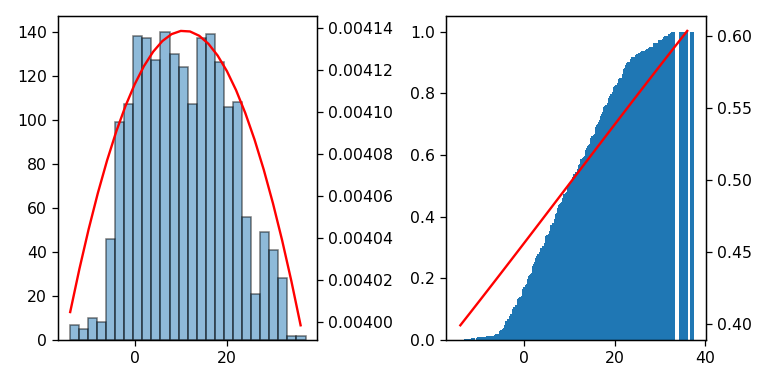

In [131]:
# Histograma de los datos
fig, axs = plt.subplots(1,2,figsize=(6,3), tight_layout=True)
axs[0].hist(data, alpha=0.5,edgecolor = 'black', bins=sturgesRule(data))
ax1 = axs[0].twinx()

# Genera arreglo de probabilidades
vec = range(-14,37,2)
dvec = []
for i in vec:
    dvec.append(scipy.stats.norm.pdf(x=i, loc=np.mean(data), scale=np.var(data)))
ax1.plot(vec,dvec,color='red')

# Dist P Acumulada simulada
x,y = ecdf(data)
axs[1].bar(x,y)

# Dist P Acumulada teórica
ax2 = axs[1].twinx()
pvec = []
for i in vec:
    pvec.append(scipy.stats.norm.cdf(x=i, loc=np.mean(data), scale=np.var(data)))
ax2.plot(vec,pvec,color='red')
plt.draw()


Del histograma, podemos ver que es bimodal y la distribución es relativamente simétrica.

In [132]:
# estadisticos
display(data.describe())

count    2000.000000
mean       10.707636
std         9.820613
min       -14.088889
25%         2.708333
50%        10.036111
75%        17.831944
max        37.072222
Name: Temperature (C), dtype: float64

Podemos visualizar cierta correlación con la distribución de probabilidad normal

2. (1 punto) Seleccione aleatoriamente una cantidad N de sus datos y calcule 3 estadísticos muestrales, luego aumente la cantidad de datos seleccionado (N++), grafique los valores de los estadísticos muestrales en cada iteración ¿qué ocurre con los estadísticos muestrales a medida que aumenta N?. Investigue y responda en base a la ley de los grandes números.


<IPython.core.display.Javascript object>


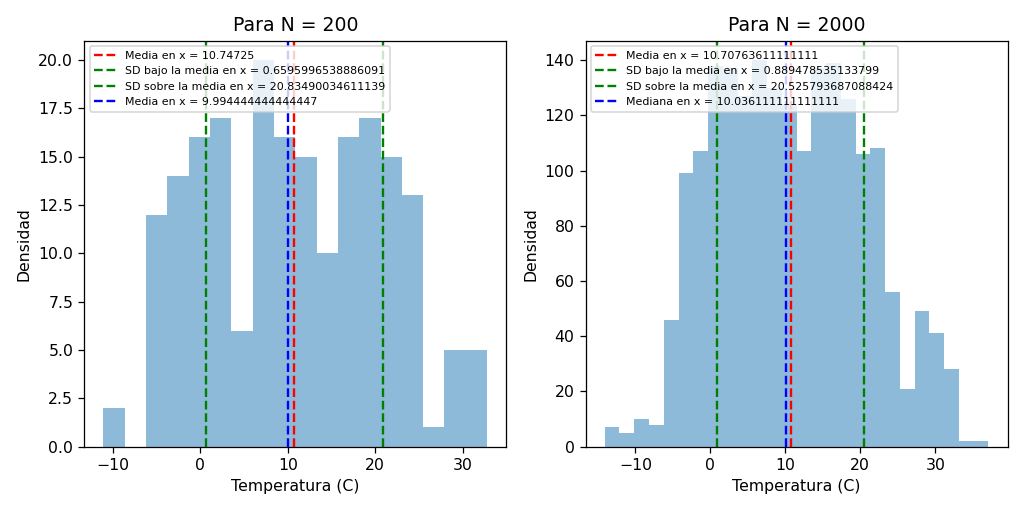

In [133]:
N = 2000
N_sel = np.random.choice(data,int(N/10), replace=False)
Nplus = np.random.choice(data,N, replace=False)
fig, (ax,bx) = plt.subplots(1,2, figsize=(8,4), tight_layout=True)

ax.hist(N_sel, alpha=0.5, bins=sturgesRule(N_sel))
ax.set_title('Para N = {}'.format(len(N_sel)))
ax.set_xlabel('Temperatura (C)')
ax.set_ylabel('Densidad')
Nsel_media = np.mean(N_sel)
Nsel_dev = np.std(N_sel)
Nsel_mediana =np.median(N_sel)
ax.axvline(x=Nsel_media, color='r', linestyle='--', label='Media en x = {}'.format(Nsel_media))
ax.axvline(x=Nsel_media-Nsel_dev , color='g', linestyle='--', label='SD bajo la media en x = {}'.format(Nsel_media-Nsel_dev))
ax.axvline(x=Nsel_media+Nsel_dev , color='g', linestyle='--', label='SD sobre la media en x = {}'.format(Nsel_media+Nsel_dev))
ax.axvline(x=Nsel_mediana , color='b', linestyle='--', label='Media en x = {}'.format(Nsel_mediana))


bx.hist(Nplus, alpha=0.5, bins=sturgesRule(Nplus))
bx.set_title('Para N = {}'.format(len(Nplus)))
bx.set_xlabel('Temperatura (C)')
bx.set_ylabel('Densidad')
Nplus_media = np.mean(Nplus)
Nplus_dev = np.std(Nplus)
Nplus_mediana = np.median(Nplus)
bx.axvline(x=Nplus_media, color='r', linestyle='--', label='Media en x = {}'.format(Nplus_media))
bx.axvline(x=Nplus_media-Nplus_dev , color='g', linestyle='--', label='SD bajo la media en x = {}'.format(Nplus_media-Nplus_dev))
bx.axvline(x=Nplus_media+Nplus_dev , color='g', linestyle='--', label='SD sobre la media en x = {}'.format(Nplus_media+Nplus_dev))


bx.axvline(x=Nplus_mediana , color='b', linestyle='--', label='Mediana en x = {}'.format(Nplus_mediana))

ax.legend(loc=2, prop={'size': 7})
bx.legend(loc=2, prop={'size': 7})


plt.show()

De los histogramas podemos concluir que los estadísticos convergen a valores similares (diferencias de menos de un grado) dependiendo del valor de N.  

3. (1 punto) Divida su set de datos en distintos grupos (aleatoriamente) y calcule los estadísticos muestrales de cada grupo y grafique el histograma resultante. Por ejemplo: para el caso de la media, debe calcular la media para cada grupo y luego graficar el histograma del conjunto de medias. ¿los estadísticos muestrales cumplen el Teorema del Límite Central? Justifique su respuesta.

<IPython.core.display.Javascript object>


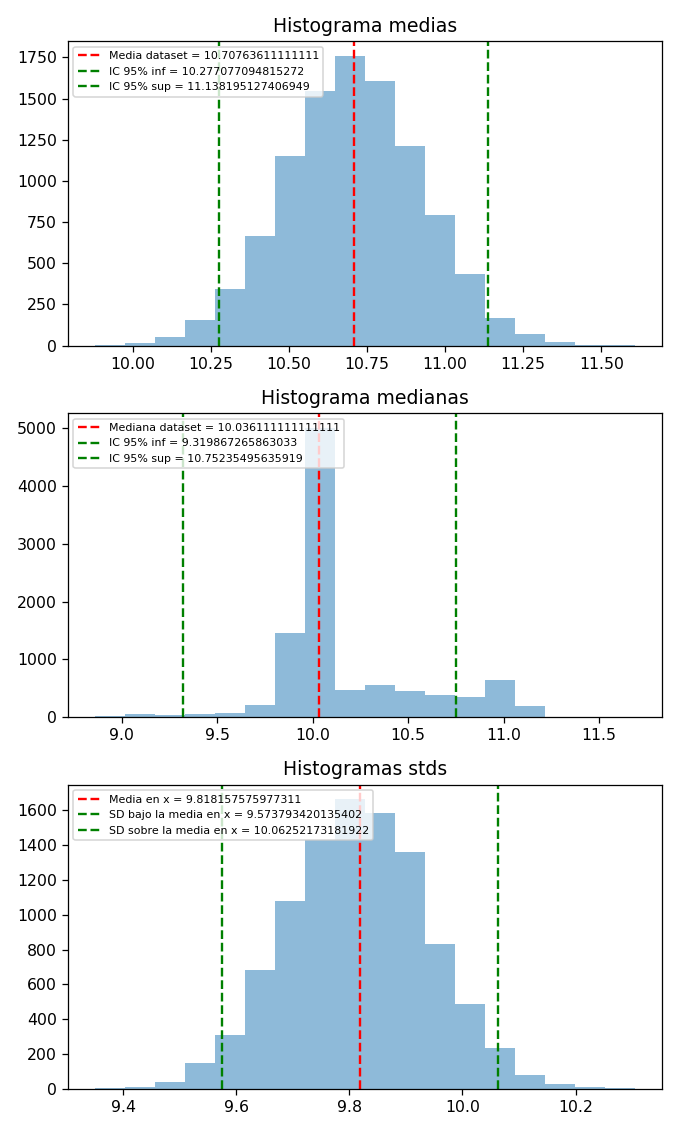

In [135]:
medias = []
medianas = []
stds = []
media_dataset = np.mean(data)
mediana_dataset = np.median(data)
std_dataset = np.std(data)

for i in range(10000):
    grupo = np.random.choice(data,len(data), replace=True)
    medianas.append(np.median(grupo))
    medias.append(np.mean(grupo))
    stds.append(np.std(grupo))
    
fig, (ax,bx,cx) = plt.subplots(3,1,figsize=(6,10), tight_layout=True)
ax.hist(medias, alpha=0.5, bins=sturgesRule(N_sel))
ax.set_title('Histograma medias')
media_dev = np.std(medias)
rango = media_dev * 1.96
ax.axvline(x=media_dataset, color='r', linestyle='--', label='Media dataset = {}'.format(media_dataset))
ax.axvline(x=media_dataset-rango , color='g', linestyle='--', label='IC 95% inf = {}'.format(media_dataset-rango))
ax.axvline(x=media_dataset+rango , color='g', linestyle='--', label='IC 95% sup = {}'.format(media_dataset+rango))

bx.hist(medianas, alpha=0.5, bins=sturgesRule(N_sel))
bx.set_title('Histograma medianas')

mediana_dev = np.std(medianas)
rango = mediana_dev * 1.96
bx.axvline(x=mediana_dataset, color='r', linestyle='--', label='Mediana dataset = {}'.format(mediana_dataset))
bx.axvline(x=mediana_dataset-rango , color='g', linestyle='--', label='IC 95% inf = {}'.format(mediana_dataset-rango))
bx.axvline(x=mediana_dataset+rango , color='g', linestyle='--', label='IC 95% sup = {}'.format(mediana_dataset+rango))

cx.hist(stds, alpha=0.5, bins=sturgesRule(N_sel))
cx.set_title('Histogramas stds')

stds_dev = np.std(stds)
rango = stds_dev * 1.96

cx.axvline(x=std_dataset, color='r', linestyle='--', label='Media en x = {}'.format(std_dataset))
cx.axvline(x=std_dataset-rango , color='g', linestyle='--', label='SD bajo la media en x = {}'.format(std_dataset-rango))
cx.axvline(x=std_dataset+rango , color='g', linestyle='--', label='SD sobre la media en x = {}'.format(std_dataset+rango))

ax.legend(loc=2, prop={'size': 7})
bx.legend(loc=2, prop={'size': 7})
cx.legend(loc=2, prop={'size': 7})

plt.show()

De los histogramas podemos apreciar que se cumple el teorema del límite central, ya que los estadísticos del dataset completo son prácticamente idénticos a los es


4. (0,5 pts) Defina una hipótesis sobre la distribución que siguen sus datos, utilice el test Kolmogorov-Smirnov ¿Puede rechazar la hipótesis? (usando un 95% de confianza). Comente sus resultados.


#### Test de Kolmogorov-Smirnov usando un 95% de confianza

In [ ]:
Dn, pvalue = scipy.stats.kstest(data, scipy.stats.norm.cdf) 
print(i, Dn, pvalue)
if pvalue < 0.05:
    display("Rechazo la hipótesis nula: nuestros datos no siguen la distribución especificada.")

5. (1 punto) Calcule la incerteza de sus estadísticos muestrales utilizando bootstrap. Interprete sus resultados.

### Referencias útiles para la parte II: 



[1] **Ley de los grandes números:**  https://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter4_TheGreatestTheoremNeverTold/Ch4_LawOfLargeNumbers_PyMC3.ipynb


[2] Ross, https://drive.google.com/file/d/1tenWSvfAU2336m-km4vRMorKmDIQRKme/view?usp=sharing

## Parte III: Conclusiones


1. (0,8 pts) Presente las conclusiones de su trabajo. 

2. (0,2 pts) Además reflexione respecto a qué significa que los datos sean **independientes e identicamente distribuidos** y por qué se debe cumplir esta condición en los grupos seleccionados aleatoriamente en las preguntas 2 y 3 de la parte II (puede reflexionar en torno a qué pasaría si no lo fueran) 
